# Summary
Exploring the jaccard scores generated between fragments+neutral losses and MDs.

Scores are organised in a (large) csv that looks like this:
```
    fragment0 →
MD0 Jaccard0,0
↓
```

In [14]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pickle
import time

data_path = "/mnt/scratch/louwe015/Mass_differences/data/"

## Determine AllPositive version; default is version 2

In [2]:
all_pos_version1 = False
if all_pos_version1:
    all_pos = "gnps_positive_ionmode_cleaned_by_matchms_and_lookups"
else:
    all_pos = "ALL_GNPS_210125_positive_cleaned_by_matchms_and_lookups"

print(all_pos)

ALL_GNPS_210125_positive_cleaned_by_matchms_and_lookups


In [4]:
if all_pos_version1:
    jacc_mat_file = "jaccard_matrix_allpos1_25-2-2021.csv"
else:
    jacc_mat_file = "jaccard_matrix_allpos2_25-2-2021.csv"
print(jacc_mat_file)

jaccard_matrix_allpos2_25-2-2021.csv


## Explore jaccard matrix

In [6]:
jacc_mat_path = os.path.join(data_path, "jaccard_matrices", jacc_mat_file)
print(jacc_mat_path, os.path.isfile(jacc_mat_path))

/mnt/scratch/louwe015/Mass_differences/data/jaccard_matrices/jaccard_matrix_allpos2_25-2-2021.csv True


In [17]:
# record rows, cols and dict of 5 highest scores {md:vals}
cols = []
rows = []
md_dict5 = {}
start = time.time()
with open(jacc_mat_path) as inf:
    header = inf.readline()
    cols = header.strip(", ").split(",")
    print("Number of fragments and neutral losses:", len(cols))
    for line in inf:
        line = line.strip().split(",")
        md = line.pop(0)
        top5 = sorted(map(float, line), reverse=True)[:5]
        md_dict5[md] = top5
        rows.append(md)
        rowlen = len(rows)
        if rowlen % 2000 == 0:
            print("At MD", rowlen)
end = time.time()
print("Took {:.3f} hours".format((end-start)/3600))

Number of fragments and neutral losses: 115913
At MD 2000
At MD 4000
At MD 6000
At MD 8000
At MD 10000
At MD 12000
At MD 14000
At MD 16000
At MD 18000
At MD 20000
At MD 22000
At MD 24000
At MD 26000
At MD 28000
At MD 30000
At MD 32000
At MD 34000
At MD 36000
At MD 38000
At MD 40000
At MD 42000
At MD 44000
At MD 46000
At MD 48000
At MD 50000
At MD 52000
At MD 54000
At MD 56000
At MD 58000
At MD 60000
Took 0.414 hours


In [18]:
del(md_dict)

In [19]:
[md_dict5[md] for md in rows[:5]]

[[0.06630971993410215,
  0.06272530641672674,
  0.05877309221295502,
  0.05828996282527881,
  0.057673745173745176],
 [0.21908169350029816,
  0.20482897384305834,
  0.18041464490516101,
  0.17011853588641396,
  0.1649621599509102],
 [0.18679829655439412,
  0.18562513685132473,
  0.17540398346486283,
  0.16659663865546218,
  0.16403107609234668],
 [0.04163251925913784,
  0.040095881455654826,
  0.03920525102004612,
  0.037328339575530584,
  0.03689902089726728],
 [0.0503125,
  0.047068021892103205,
  0.044156467482601394,
  0.04302624806999485,
  0.04291154071470416]]

In [28]:
max_vals = []
for md in rows:
    vals = md_dict5[md]
    max_vals.append(max(vals))

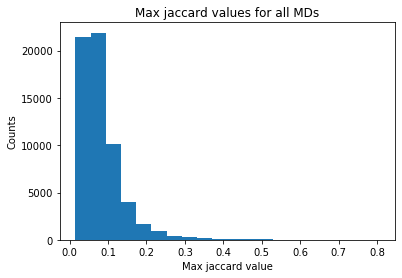

In [29]:
plt.hist(max_vals, bins=20)
plt.title("Max jaccard values for all MDs")
plt.xlabel("Max jaccard value")
plt.ylabel("Counts")
plt.show()